In [1]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [95]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971935e+07,1.971935e+07,False,NaN,1,NaN,NaN,NaN,2024-07-03T01:55:00.000Z,61826.520843,2.013518e+10,-14.8163,-0.424090,-1.644692,-0.355560,-9.621394,-1.662165,-6.520016,1.219179e+12,53.1973,1.298357e+12,NaN,2024-07-03T01:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 20:56:17.539425
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201935e+08,1.201935e+08,True,NaN,2,NaN,NaN,NaN,2024-07-03T01:54:00.000Z,3400.826738,9.490780e+09,-16.2684,-0.658157,-1.278928,-0.294248,-10.475194,9.347340,2.536701,4.087572e+11,17.8358,4.087572e+11,NaN,2024-07-03T01:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 20:56:17.539425
2,825,Tether USDt,USDT,tether,90758,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-07-03T01:54:00.000Z,0.998712,3.967444e+10,-8.2544,0.001023,-0.021012,-0.109104,-0.054367,-0.190486,-0.164295,1.126421e+11,4.9150,1.159273e+11,NaN,2024-07-03T01:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 20:56:17.539425
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,NaN,2024-07-03T01:54:00.000Z,577.637287,1.520068e+09,-2.1325,-0.372289,0.498723,-0.760249,-4.822351,-1.438430,1.285784,8.524948e+10,3.7198,8.524948e+10,NaN,2024-07-03T01:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 20:56:17.539425
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627752e+08,5.793798e+08,True,NaN,5,NaN,NaN,NaN,2024-07-03T01:54:00.000Z,152.814083,2.076675e+09,22.8193,-0.597875,3.563300,10.286678,-6.925943,6.296779,-17.287077,7.071856e+10,3.0857,8.853739e+10,NaN,2024-07-03T01:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 20:56:17.539425
5,3408,USDC,USDC,usd-coin,20686,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.257721e+10,3.257721e+10,False,NaN,6,NaN,NaN,NaN,2024-07-03T01:54:00.000Z,0.999992,4.159330e+09,-6.9150,-0.007342,0.012960,-0.003772,-0.005921,-0.022432,-0.000294,3.257695e+10,1.4215,3.257695e+10,NaN,2024-07-03T01:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-02 20:56:17.539425
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,NaN,2024-07-03T01:55:00.000Z,0.484212,8.709740e+08,10.1973,-0.249750,1.597788,1.586796,-6.384080,-8.787233,-15.629959,2.696497e+10,1.1766,4.842122e+10,NaN,2024-07-03T01:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 20:56:17.539425
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460342e+09,5.108444e+09,True,NaN,8,3.414167e+09,2.756938e+10,NaN,2024-07-03T01:54:00.000Z,8.074996,3.121172e+08,66.0674,-0.169512,4.062606,7.344860,17.625354,41.913788,62.345101,1.986725e+10,0.8669,4.125067e+10,NaN,2024-07-03T01:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 20:56:17.539425
8,74,Dogecoin,DOGE,dogecoin,1017,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.4

In [ ]:
df = pd.read_csv(r'C:\Users\gilmo\OneDrive\Documents\CryptoAPI-PythonPull\API.csv')

In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import sleep

# CoinMarketCap API URL and parameters
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start': '1',
  'limit': '30',
  'convert': 'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',  # Remember to keep your API key secure
}

# Initialize the session
session = Session()
session.headers.update(headers)

# DataFrame to store the data
df = pd.DataFrame()

def api_runner():
    global df
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
        # Normalize the JSON data and append to the DataFrame
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')
        df = pd.concat([df, df2], ignore_index=True)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

# Print all columns and rows in the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loop to call the API runner function multiple times
for i in range(7):  # Adjust the range based on how many times you want to call the API, after range is fulfilled, rest of block will execute and append to specified path.csv file we want
    api_runner()
    print(f'API Runner completed successfully {i+1} times')
    sleep(10)  # Sleep for 10 seconds (adjust as needed)

# Ensure the directory exists
directory = r'C:\Users\gilmo\OneDrive\Documents\CryptoAPI-PythonPull'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file
file_path = os.path.join(directory, 'API.csv')
if not os.path.isfile(file_path):
    df.to_csv(file_path, index=False)
else:
    df.to_csv(file_path, mode='a', header=False, index=False)

# Check if the file was saved successfully
try:
    saved_df = pd.read_csv(file_path)
    print("Data saved successfully to CSV.")
    print(saved_df.tail())  # Print the last few rows to verify
except Exception as e:
    print(f"An error occurred while reading the saved file: {e}")


API Runner completed successfully 1 times
API Runner completed successfully 2 times
API Runner completed successfully 3 times
API Runner completed successfully 4 times
API Runner completed successfully 5 times
API Runner completed successfully 6 times
API Runner completed successfully 7 times
Data saved successfully to CSV.
         id                                   name symbol              slug  \
1045   1321                       Ethereum Classic    ETC  ethereum-classic   
1046   3773  Artificial Superintelligence Alliance    FET             fetch   
1047  21794                                  Aptos    APT             aptos   
1048    512                                Stellar    XLM           stellar   
1049    328                                 Monero    XMR            monero   

      num_market_pairs                date_added  \
1045               546  2016-07-24T00:00:00.000Z   
1046               338  2019-03-02T00:00:00.000Z   
1047               400  2022-10-19T01:50:25

In [5]:
#Using Lambda to reformat high value numbers and make more readable to interpret

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [55]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726090.00000,19726090.00000,False,NaN,1,NaN,NaN,NaN,2024-07-15T20:32:00.000Z,63638.57197,37321605832.37693,74.86870,0.41183,5.99073,12.79294,-3.59523,-2.28318,1.10741,1255340198059.59619,53.65910,1336410011271.94995,NaN,2024-07-15T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,3440.43659,17428346099.56755,72.14260,1.53326,7.61235,14.18495,-3.00050,17.07667,11.98196,413602231545.02191,17.70850,413602231545.02002,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
2,825,Tether USDt,USDT,tether,91604,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112536925458.19319,116072162581.85667,True,NaN,3,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,1.00109,64243228741.56741,61.48600,-0.02465,0.07221,0.11393,0.15186,0.10379,0.07195,112659853205.12434,4.82160,116198951983.38000,NaN,2024-07-15T20:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 15:34:04.660392
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582197.77307,147582197.77307,False,NaN,4,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,578.38077,1983696164.40089,36.72560,0.15734,7.51177,13.82783,-4.34455,1.95406,7.56830,85358705736.70114,3.65320,85358705736.70000,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464069002.19401,580133199.56013,True,NaN,5,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,156.81056,2496477356.41466,26.36370,0.76955,7.59729,12.94695,8.87211,-0.96614,17.23925,72770919112.60857,3.11440,90971010647.42000,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
5,3408,USDC,USDC,usd-coin,20965,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33865600018.88607,33865600018.88607,False,NaN,6,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,1.00014,7174568980.97112,77.89560,-0.04344,0.00928,0.01016,-0.00577,0.01165,0.00933,33870236575.43128,1.44960,33870236575.43000,NaN,2024-07-15T20:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 15:34:04.660392
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,NaN,2024-07-15T20:32:00.000Z,0.53452,1778512307.22639,-2.53020,0.16060,0.29927,24.19736,8.92906,3.34662,8.28903,29829125526.47869,1.27660,53452099401.55000,NaN,2024-07-15T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2511525373.58612,5109029099.83456,True,NaN,8,3414166606.00000,25803834321.47150,NaN,2024-07-15T20:31:00.000Z,7.55787,260452533.69654,53.12460,0.32085,2.98164,6.17891,-4.68343,13.55996,24.01678,18981787391.48154,0.81150,38613388170.35000,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,N

In [7]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,6.07826,12.93053,-3.56392,-2.19566,1.17535
Ethereum,7.60965,14.24964,-3.01698,17.08362,12.03855
Tether USDt,0.06458,0.10445,0.15066,0.09502,0.06541
BNB,7.50620,13.83277,-4.34912,1.95328,7.55051
Solana,7.59647,13.00080,8.89834,-0.94617,17.28646
USDC,0.00575,-0.00281,-0.00298,0.00353,0.00443
XRP,0.31021,24.20588,8.87092,3.34928,8.28795
Toncoin,2.97828,6.19093,-4.64251,13.57522,24.05733
Dogecoin,8.68886,14.08665,-9.84102,-17.67367,-20.47821


In [8]:
# we can stack to make more readable and easier to interpret, keep in mind this will make it a series and not just a dataframe

dfStack = df3.stack()
dfStack

name                                                               
Bitcoin                                quote.USD.percent_change_24h     6.07826
                                       quote.USD.percent_change_7d     12.93053
                                       quote.USD.percent_change_30d    -3.56392
                                       quote.USD.percent_change_60d    -2.19566
                                       quote.USD.percent_change_90d     1.17535
Ethereum                               quote.USD.percent_change_24h     7.60965
                                       quote.USD.percent_change_7d     14.24964
                                       quote.USD.percent_change_30d    -3.01698
                                       quote.USD.percent_change_60d    17.08362
                                       quote.USD.percent_change_90d    12.03855
Tether USDt                            quote.USD.percent_change_24h     0.06458
                                       quote.USD.per

In [9]:
type(df)


pandas.core.frame.DataFrame

In [20]:
type(dfStack)

pandas.core.series.Series

In [11]:
dfStack1 = dfStack.to_frame(name='Values')
dfStack1

Values
name                                                                        
Bitcoin                               quote.USD.percent_change_24h   6.07826
                                      quote.USD.percent_change_7d   12.93053
                                      quote.USD.percent_change_30d  -3.56392
                                      quote.USD.percent_change_60d  -2.19566
                                      quote.USD.percent_change_90d   1.17535
Ethereum                              quote.USD.percent_change_24h   7.60965
                                      quote.USD.percent_change_7d   14.24964
                                      quote.USD.percent_change_30d  -3.01698
                                      quote.USD.percent_change_60d  17.08362
                                      quote.USD.percent_change_90d  12.03855
Tether USDt                           quote.USD.percent_change_24h   0.06458
                                      quote.USD.percent_change_7d    0.10445
                                      quote.USD.percent_change_30d   0.15066
                                      quote.USD.percent_change_60d   0.09502
                                      quote.USD.percent_change_90d   0.06541
BNB                                   quote.USD.percent_change_24h   7.50620
                                      quote.USD.percent_change_7d   13.83277
                                      quote.USD.percent_change_30d  -4.34912
                                      quote.USD.percent_change_60d   1.95328
                                      quote.USD.percent_change_90d   7.55051
Solana                                quote.USD.percent_change_24h   7.59647
                                      quote.USD.percent_change_7d   13.00080
                                      quote.USD.percent_change_30d   8.89834
                                      quote.USD.percent_change_60d  -0.94617
                                      quote.USD.percent_change_90d  17.28646
USDC                                  quote.USD.percent_change_24h   0.00575
                                      quote.USD.percent_change_7d   -0.00281
                                      quote.USD.percent_change_30d  -0.00298
                                      quote.USD.percent_change_60d   0.00353
                                      quote.USD.percent_change_90d   0.00443
XRP                                   quote.USD.percent_change_24h   0.31021
                                      quote.USD.percent_change_7d   24.20588
                                      quote.USD.percent_change_30d   8.87092
                                      quote.USD.percent_change_60d   3.34928
                                      quote.USD.percent_change_90d   8.28795
Toncoin                               quote.USD.percent_change_24h   2.97828
                                      quote.USD.percent_change_7d    6.19093
                                      quote.USD.percent_change_30d  -4.64251
                                      quote.USD.percent_change_60d  13.57522
                                      quote.USD.percent_change_90d  24.05733
Dogecoin                              quote.USD.percent_change_24h   8.68886
                                      quote.USD.percent_change_7d   14.08665
                                      quote.USD.percent_change_30d  -9.84102
                                      quote.USD.percent_change_60d -17.67367
                                      quote.USD.percent_change_90d -20.47821
Cardano                               quote.USD.percent_change_24h   0.57890
                                      quote.USD.percent_change_7d   18.61959
                                      quote.USD.percent_change_30d   5.91381
                                      quote.USD.percent_change_60d  -4.31736
                                      quote.USD.percent_change_90d  -3.53331
TRON                                  quote.USD.percent_change_24h

In [12]:
type(dfStack1) # Now this is core of DF , no longer series bc we appended Previous (Series) dfStack to dfStack1 (:

pandas.core.frame.DataFrame

In [13]:
type(dfStack) #Note the series.Series   = series and not core Dataframe

pandas.core.series.Series

In [ ]:
#name is almost like an index so we want to create index using Name column, we'll have to create an index  
#we want our index to display how many rows there are
#can make dynamic but first lets just get the bones set up

dfStack2 = dfStack1.set_index(dfStack['name'])
dfStack2

In [26]:
 dfStack1.count() # Come back to this to make dynamic

Values    150
dtype: int64

In [29]:
#name is almost like an index so we want to create index using Name column, we'll have to create an index  
#we want our index to display how many rows there are
#can make dynamic but first lets just get the bones set up and hardcode for now

index = pd.Index(range(150))

dfStack2 = dfStack1.reset_index()
dfStack2

#we had to reset index because it was already indexed, fixed the issue and displaying how I want now
#Just need to rename Level_1

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_24h,6.07826
1,Bitcoin,quote.USD.percent_change_7d,12.93053
2,Bitcoin,quote.USD.percent_change_30d,-3.56392
3,Bitcoin,quote.USD.percent_change_60d,-2.19566
4,Bitcoin,quote.USD.percent_change_90d,1.17535
5,Ethereum,quote.USD.percent_change_24h,7.60965
6,Ethereum,quote.USD.percent_change_7d,14.24964
7,Ethereum,quote.USD.percent_change_30d,-3.01698
8,Ethereum,quote.USD.percent_change_60d,17.08362
9,Ethereum,quote.USD.percent_change_90d,12.03855


In [31]:
dfStack3 = dfStack2.rename(columns={'level_1':'percent_change'})
                        #Column to be manipulated  -->   #String to rename specified column we want to manipulate

dfStack3

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_24h,6.07826
1,Bitcoin,quote.USD.percent_change_7d,12.93053
2,Bitcoin,quote.USD.percent_change_30d,-3.56392
3,Bitcoin,quote.USD.percent_change_60d,-2.19566
4,Bitcoin,quote.USD.percent_change_90d,1.17535
5,Ethereum,quote.USD.percent_change_24h,7.60965
6,Ethereum,quote.USD.percent_change_7d,14.24964
7,Ethereum,quote.USD.percent_change_30d,-3.01698
8,Ethereum,quote.USD.percent_change_60d,17.08362
9,Ethereum,quote.USD.percent_change_90d,12.03855


In [35]:
dfStack3['percent_change'] = dfStack3['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
dfStack3

,name,percent_change,Values
0,Bitcoin,24h,6.07826
1,Bitcoin,7d,12.93053
2,Bitcoin,30d,-3.56392
3,Bitcoin,60d,-2.19566
4,Bitcoin,90d,1.17535
5,Ethereum,24h,7.60965
6,Ethereum,7d,14.24964
7,Ethereum,30d,-3.01698
8,Ethereum,60d,17.08362
9,Ethereum,90d,12.03855


In [40]:
#now lets move on to actually visualizing the data gnna need matplot lib and seaborn

import seaborn as sns
import matplotlib.pyplot as plt


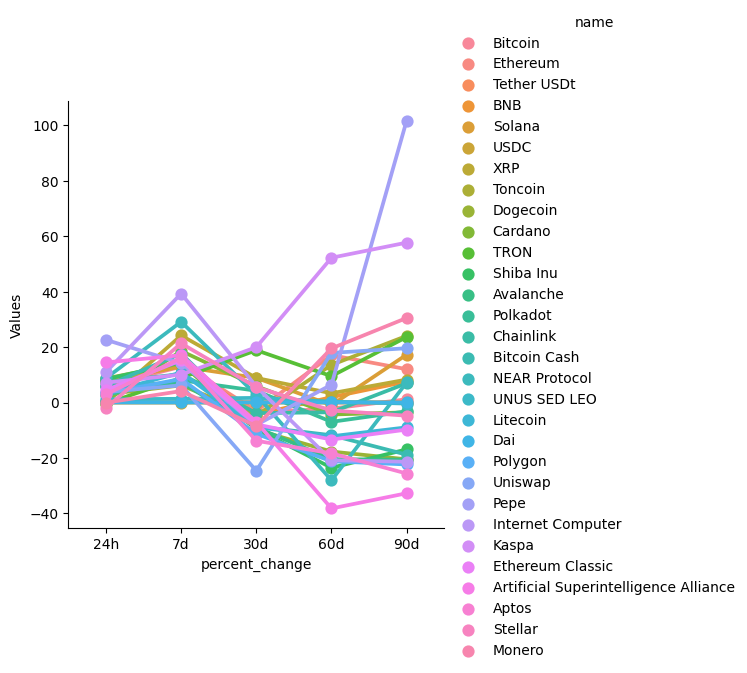

In [41]:



sns.catplot(x='percent_change', y='Values', hue='name', data=dfStack3, kind='point')

#gnna need to change color legend and column names so that it looks more complete

In [43]:
dfStack4 = df[['name','quote.USD.price', 'timestamp']]
dfStack4 = dfStack4.query("name == 'Bitcoin'")
dfStack4

,name,quote.USD.price,timestamp
0,Bitcoin,63638.57197,2024-07-15 15:34:04.660392
30,Bitcoin,63638.57197,2024-07-15 15:34:14.728918
60,Bitcoin,63638.57197,2024-07-15 15:34:24.858735
90,Bitcoin,63722.73992,2024-07-15 15:34:34.999833
120,Bitcoin,63722.73992,2024-07-15 15:34:45.145171
150,Bitcoin,63722.73992,2024-07-15 15:34:55.283880
180,Bitcoin,63722.73992,2024-07-15 15:35:05.426731


In [46]:
#to find distinct cryptos we are tracking

dfStack3
# Count of distinct unique names
unique_names_count = dfStack3['name'].nunique()

print(f'The number of distinct unique names is: {unique_names_count}')

The number of distinct unique names is: 30


In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726090.00000,19726090.00000,False,NaN,1,NaN,NaN,NaN,2024-07-15T20:32:00.000Z,63638.57197,37321605832.37693,74.86870,0.41183,5.99073,12.79294,-3.59523,-2.28318,1.10741,1255340198059.59619,53.65910,1336410011271.94995,NaN,2024-07-15T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,3440.43659,17428346099.56755,72.14260,1.53326,7.61235,14.18495,-3.00050,17.07667,11.98196,413602231545.02191,17.70850,413602231545.02002,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
2,825,Tether USDt,USDT,tether,91604,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112536925458.19319,116072162581.85667,True,NaN,3,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,1.00109,64243228741.56741,61.48600,-0.02465,0.07221,0.11393,0.15186,0.10379,0.07195,112659853205.12434,4.82160,116198951983.38000,NaN,2024-07-15T20:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 15:34:04.660392
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582197.77307,147582197.77307,False,NaN,4,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,578.38077,1983696164.40089,36.72560,0.15734,7.51177,13.82783,-4.34455,1.95406,7.56830,85358705736.70114,3.65320,85358705736.70000,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464069002.19401,580133199.56013,True,NaN,5,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,156.81056,2496477356.41466,26.36370,0.76955,7.59729,12.94695,8.87211,-0.96614,17.23925,72770919112.60857,3.11440,90971010647.42000,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
5,3408,USDC,USDC,usd-coin,20965,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33865600018.88607,33865600018.88607,False,NaN,6,NaN,NaN,NaN,2024-07-15T20:31:00.000Z,1.00014,7174568980.97112,77.89560,-0.04344,0.00928,0.01016,-0.00577,0.01165,0.00933,33870236575.43128,1.44960,33870236575.43000,NaN,2024-07-15T20:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 15:34:04.660392
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,NaN,2024-07-15T20:32:00.000Z,0.53452,1778512307.22639,-2.53020,0.16060,0.29927,24.19736,8.92906,3.34662,8.28903,29829125526.47869,1.27660,53452099401.55000,NaN,2024-07-15T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 15:34:04.660392
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2511525373.58612,5109029099.83456,True,NaN,8,3414166606.00000,25803834321.47150,NaN,2024-07-15T20:31:00.000Z,7.55787,260452533.69654,53.12460,0.32085,2.98164,6.17891,-4.68343,13.55996,24.01678,18981787391.48154,0.81150,38613388170.35000,NaN,2024-07-15T20:31:00.000Z,NaN,NaN,NaN,NaN,N

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = dfStack4)

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import sleep

# CoinMarketCap API URL and parameters
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start': '1',
  'limit': '30',
  'convert': 'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',  # Remember to keep your API key secure
}

# Initialize the session
session = Session()
session.headers.update(headers)

# DataFrame to store the data
df = pd.DataFrame()

def api_runner():
    global df
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
        # Normalize the JSON data and append to the DataFrame
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')
        df = pd.concat([df, df2], ignore_index=True)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

# Print all columns and rows in the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loop to call the API runner function multiple times
for i in range(7):  # Adjust the range based on how many times you want to call the API, after range is fulfilled, rest of block will execute and append to specified path.csv file we want
    api_runner()
    print(f'API Runner completed successfully {i+1} times')
    sleep(10)  # Sleep for 10 seconds (adjust as needed)

# Ensure the directory exists
directory = r'C:\Users\gilmo\OneDrive\Documents\CryptoAPI-PythonPull'
if not os.path.exists(directory):
    os.makedirs(directory)

if 'self_reported_circulating_supply' in df.columns and 'quote.USD.price' in df.columns: 
df['self_reported_market_cap'] = df['self_reported_circulating_supply'].astype(float) * df['quote_USD.price'].astype(float)


# Save the DataFrame to a CSV file
file_path = os.path.join(directory, 'API.csv')
if not os.path.isfile(file_path):
    df.to_csv(file_path, index=False)
else:
    df.to_csv(file_path, mode='a', header=False, index=False)

# Check if the file was saved successfully
try:
    saved_df = pd.read_csv(file_path)
    print("Data saved successfully to CSV.")
    print(saved_df.tail())  # Print the last few rows to verify
except Exception as e:
    print(f"An error occurred while reading the saved file: {e}")

In [ ]:
df.type